In [69]:
from nltk.tokenize import word_tokenize
import pandas as pd
import nltk
from nltk.corpus import stopwords
import numpy as np

In [70]:
df = pd.read_csv('dataItem')
df = df[['concat','Category','Item']]
df = df.head(500000)

In [71]:
df['Category'].value_counts()

Deskside                101965
Access Management        72995
Application              46047
Security                 32385
Data Center              24981
Operations               14305
Network                  13355
Radio                    11232
Process Control           9348
Employee Status           7854
Voice Communication       2961
Cloud                     2708
Service Introduction       410
Security Center              9
Desktop                      1
Name: Category, dtype: int64

In [72]:
df = df[df['Category'] == 'Access Management']

In [73]:
df = df.drop(columns=['Category'],axis=1)

In [74]:
df

,concat,Item
1,Reset password for user Reset password for user,Network
2,Reset password for user Reset password for user,Network
3,Request PowerBI Gateway access for Deployment ...,EDW Business Objects
12,Please update the mfa phone number of account ...,MFA
15,Request for Global Protect We have hired Dwi H...,Other
...,...,...
340539,New hire access to Sap SAP Production or SAP T...,SAP
340540,New hire access to Sap SAP Production or SAP T...,SAP
340543,Connected Mine Supervisor Access Jason is a ne...,Connected Mine
340544,Requesting access for plant 3347 SAP Productio...,SAP


In [75]:
pd.set_option('display.max_rows', 100)

In [76]:
df['Item'].value_counts()

SAP                              10941
Network                          10927
Other                             6580
MFA                               4954
Shared Drive                      4216
Mail Distribution List            3420
Contact Information               2636
Database                          2629
EDW Business Objects              2420
Dispatch System                   2378
CyberArk                          1882
Internet Access                   1778
Physical Badge                    1709
Mailbox                           1553
Physical Access Control           1290
Global Protect                    1183
Call Center                       1145
Privileged Account                1059
Key Request                        987
SAP HR ESS/MSS                     776
USB Access                         720
FM Partner                         713
Virtual Desktop                    699
Azure Portal                       690
CAS                                528
Snowflake                

Sampling

In [77]:
n = 1000

In [78]:
df1 = df[df['Item'] == 'SAP'][0:n]
df2 = df[df['Item'] == 'Network'][0:n]
df3 = df[df['Item'] == 'Other'][0:n]
df4 = df[df['Item'] == 'MFA'][0:n]
df5 = df[df['Item'] == 'Shared Drive'][0:n]
df6 = df[df['Item'] == 'Mail Distribution List'][0:n]
df7 = df[df['Item'] == 'Database'][0:n]
df8 = df[df['Item'] == 'EDW Business Objects'][0:n]
df9 = df[df['Item'] == 'Dispatch System'][0:n]
df10 = df[df['Item'] == 'CyberArk'][0:n]
df11 = df[df['Item'] == 'Internet Access'][0:n]
df12  = df[df['Item'] == 'Physical Badge'][0:n]
df13 = df[df['Item'] == 'Mailbox'][0:n]
df14 = df[df['Item'] == 'Physical Access Control'][0:n]
df15 = df[df['Item'] == 'Global Protect'][0:n]
df16 = df[df['Item'] == 'Call Center'][0:n]
df17 = df[df['Item'] == 'Privileged Account'][0:n]
df18 = df[df['Item'] == 'Key Request'][0:n]
df19 = df[df['Item'] == 'SAP HR ESS/MSS'][0:n]
df20 = df[df['Item'] == 'USB Access'][0:n]
df21 = df[df['Item'] == 'FM Partner'][0:n]
df22 = df[df['Item'] == 'Virtual Desktop'][0:n]
df23 = df[df['Item'] == 'Azure Portal'][0:n]
df24 = df[df['Item'] == 'CAS'][0:n]
df25 = df[df['Item'] == 'Snowflake'][0:n]
df26 = df[df['Item'] == 'Connected Mine'][0:n]
df27 = df[df['Item'] == 'PCN DMZ MFA'][0:n]
df28 = df[df['Item'] == 'Acquire'][0:n]
df29 = df[df['Item'] == 'Contact Information'][0:n]

In [79]:
df = pd.concat([df1,df2,df3,df4,df5,df6,df7,df8,df9,df10,df11,df12,df13,df14,df15,df16,df17,df18,df19,df20,df21,df22,df23,df24,df25,df26,df27,df28,df29],ignore_index=True)
df        

,concat,Item
0,Create a SuccessFactors user for Eduardo Vilch...,SAP
1,Adam Morisset requires maint craft SAP access ...,SAP
2,Adam Morisset requires maint craft SAP access ...,SAP
3,Marcus McFarland is new to maintenance 3111 He...,SAP
4,Marcus McFarland is new to maintenance 3111 He...,SAP
...,...,...
24943,Reactivate SAP Account for #600709783 Please r...,Contact Information
24944,Reactivate Please Reactivate the attached with...,Contact Information
24945,Update Phone Extension Please choose the requi...,Contact Information
24946,Update mobile phone number in address book. Ne...,Contact Information


In [80]:
from imblearn.over_sampling import RandomOverSampler
oversample = RandomOverSampler()
X_over, y_over = oversample.fit_resample(df[['concat']], df[['Item']])

In [81]:
df = pd.DataFrame()
df['concat'] = X_over['concat']
df['Item'] = y_over['Item']

In [82]:
df['Item'].value_counts()

Azure Portal               1000
USB Access                 1000
Internet Access            1000
Call Center                1000
CyberArk                   1000
Physical Access Control    1000
Acquire                    1000
PCN DMZ MFA                1000
Contact Information        1000
Privileged Account         1000
Other                      1000
Network                    1000
Key Request                1000
MFA                        1000
Global Protect             1000
Shared Drive               1000
FM Partner                 1000
CAS                        1000
Snowflake                  1000
Mail Distribution List     1000
Physical Badge             1000
Connected Mine             1000
SAP                        1000
Virtual Desktop            1000
SAP HR ESS/MSS             1000
Dispatch System            1000
Mailbox                    1000
Database                   1000
EDW Business Objects       1000
Name: Item, dtype: int64

In [83]:
#Stopwords corpus
import nltk
nltk.download('stopwords')
en_stop = set(nltk.corpus.stopwords.words('english'))

#Preprocessing function
numbers = ['0','1','2','3','4','5','6','7','8','9']
def prepare_text(text):
    tokens = text
    tokens = [token for token in tokens if len(token) > 2] #Remove words with less than 2 characters
    tokens = [token for token in tokens if token not in en_stop] #Remove stopwords
    tokens = [token for token in tokens if not any(number in token for number in numbers)]  #Remove numbers   
    tokens = [token.replace('[^\w\s]','') for token in tokens] #Remove punctuation
    tokens = [token.replace('_','') for token in tokens] #Remove punctuation
    return tokens

#tokens to str
def tostr(text):
    str1 = "" 
    for word in text: 
        str1 += word.lower()
        str1 += ' '
    return str1

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Mateio\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Tokenize to apply preprocessing

In [84]:
df['tokenized_text'] = df['concat'].apply(word_tokenize) 

Preprocessing

In [85]:
df['prep_text'] = df['tokenized_text'].apply(prepare_text)

Changing to str again

In [86]:
df['prep_text'] = df['prep_text'].apply(tostr)

Drop useless columnss

In [87]:
df['Texto'] = df['prep_text']
df = df.drop(columns=['prep_text','tokenized_text','concat'],axis=1)
df.head(3)

,Item,Texto
0,SAP,create successfactors user eduardo vilchez wou...
1,SAP,adam morisset requires maint craft sap access ...
2,SAP,adam morisset requires maint craft sap access ...


Filtering Service Introduction because there are not much observations

Target distribution:

In [88]:
df['Item'].value_counts()

Azure Portal               1000
USB Access                 1000
Internet Access            1000
Call Center                1000
CyberArk                   1000
Physical Access Control    1000
Acquire                    1000
PCN DMZ MFA                1000
Contact Information        1000
Privileged Account         1000
Other                      1000
Network                    1000
Key Request                1000
MFA                        1000
Global Protect             1000
Shared Drive               1000
FM Partner                 1000
CAS                        1000
Snowflake                  1000
Mail Distribution List     1000
Physical Badge             1000
Connected Mine             1000
SAP                        1000
Virtual Desktop            1000
SAP HR ESS/MSS             1000
Dispatch System            1000
Mailbox                    1000
Database                   1000
EDW Business Objects       1000
Name: Item, dtype: int64

Vectorizing: unigrams and bigrams, max features beause the RAM limitation, and strip accents

In [89]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(ngram_range=(1,2),max_features=15000,strip_accents='ascii')
X = vectorizer.fit_transform(df['Texto']).toarray()
X = pd.DataFrame(X)
X.columns = vectorizer.get_feature_names()
X

,aad,aad capolicy,aao,aardison,aaron,aastha,aastha yadav,abastari,abb,abhilash,...,zmhrlrnginstruct course,zmhrlrnginstruct instructor,zmhrpyrllcoordinate,zone,zoom,zshrlrngfldtrnngna,zshrlrngfldtrnngna zmhrlrnginstruct,zshrspooldsplyhrus,zshrspooldsplyhrus usergroup,zuniga
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
28996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
28997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
28998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Merge the X array with the category to obtain the final dataframe

In [90]:
# Finally merging all features with above bag of words sin texto porque ya fue procesada en el BoW
df_train = pd.merge(X,df.drop(columns=['Texto']),left_index=True, right_index=True)
df_train.head(3)

,aad,aad capolicy,aao,aardison,aaron,aastha,aastha yadav,abastari,abb,abhilash,...,zmhrlrnginstruct instructor,zmhrpyrllcoordinate,zone,zoom,zshrlrngfldtrnngna,zshrlrngfldtrnngna zmhrlrnginstruct,zshrspooldsplyhrus,zshrspooldsplyhrus usergroup,zuniga,Item
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,SAP
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,SAP
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,SAP


Train test split, stratified

In [91]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(df_train.drop(columns='Item'),df_train['Item'],test_size=0.2,random_state=123, stratify=df_train['Item'])

In [92]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(23200, 15000)
(5800, 15000)
(23200,)
(5800,)


### Modelling: Logistic Regression

In [93]:
from sklearn.linear_model import LogisticRegression
from sklearn import linear_model
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score
from sklearn.model_selection import GridSearchCV

Solver liblinear its faster, class_weight balanced not needed in this case because the dataset was balanced. C=0.35 was the best regularization tuned

In [94]:
Log_Ridge=LogisticRegression(penalty='l2', max_iter=10000, solver='liblinear', tol=0.0001, class_weight='balanced', C=0.35)

In [95]:
Log_Ridge.fit(X_train, y_train)

LogisticRegression(C=0.35, class_weight='balanced', max_iter=10000,
                   solver='liblinear')

In [96]:
Log_Ridge.score(X_test, y_test)

0.9393103448275862

Saving the model and vectorizer

In [97]:
import pickle

In [98]:
pickle.dump(Log_Ridge, open('ModelItemAccessManagement', 'wb'))

In [99]:
pickle.dump(vectorizer, open('VectorizerItemAccessManagement', 'wb'))

Learning curves: what happens if we add more observations

In [100]:
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_learning_curves

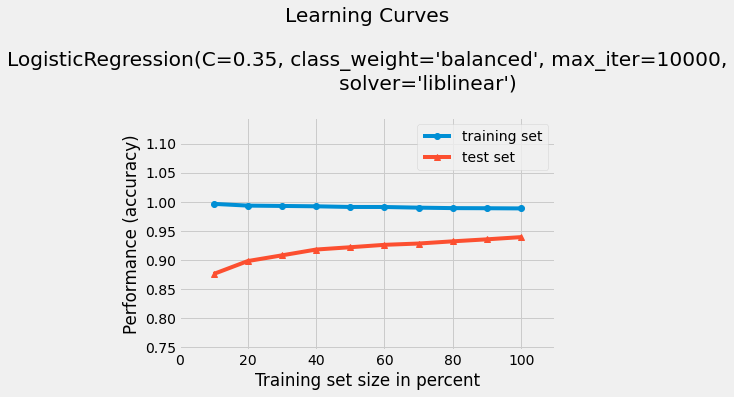

In [101]:
plot_learning_curves(X_train, y_train, X_test, y_test, Log_Ridge, scoring='accuracy')
plt.show()

Test set target distribution

In [102]:
from collections import Counter
Counter(y_test)

Counter({'Call Center': 200,
         'SAP': 200,
         'Physical Badge': 200,
         'Global Protect': 200,
         'Mail Distribution List': 200,
         'Internet Access': 200,
         'Database': 200,
         'EDW Business Objects': 200,
         'Other': 200,
         'Shared Drive': 200,
         'CyberArk': 200,
         'Connected Mine': 200,
         'Dispatch System': 200,
         'PCN DMZ MFA': 200,
         'Physical Access Control': 200,
         'Virtual Desktop': 200,
         'Mailbox': 200,
         'Privileged Account': 200,
         'Snowflake': 200,
         'MFA': 200,
         'Acquire': 200,
         'SAP HR ESS/MSS': 200,
         'USB Access': 200,
         'FM Partner': 200,
         'CAS': 200,
         'Contact Information': 200,
         'Network': 200,
         'Key Request': 200,
         'Azure Portal': 200})

Confusion matrix, values and percentage

In [103]:
y_pred = Log_Ridge.predict(X_test)

In [104]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

[Text(0.5, 1.0, 'Heatmap'),
 Text(0.5, 69.0, 'Predicted Label'),
 Text(114.0, 0.5, 'True Label')]

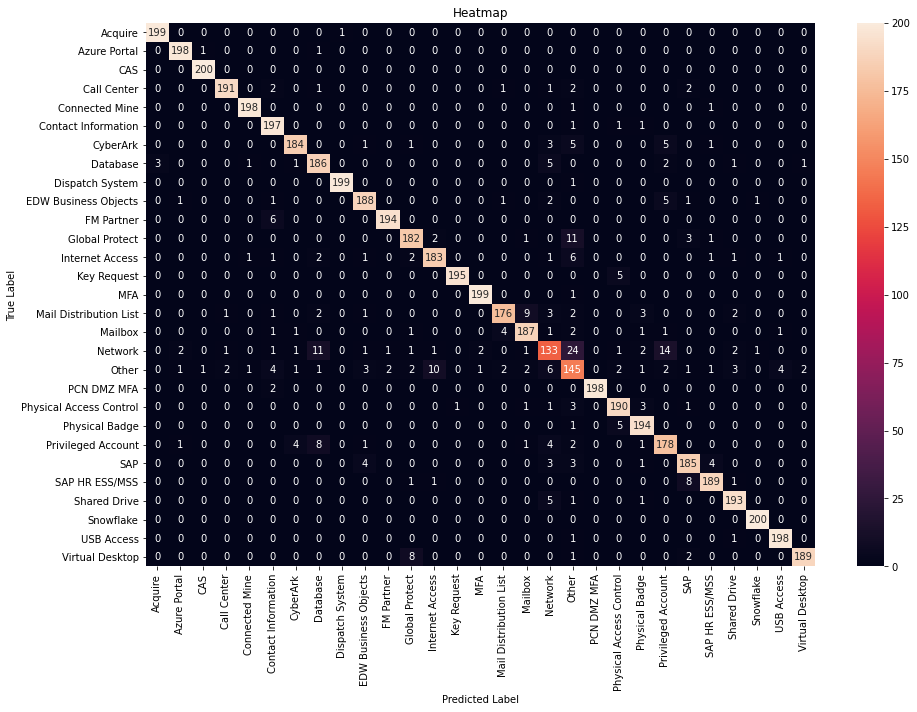

In [105]:
cm_labels = np.unique(y_test)
cm_array = confusion_matrix(y_test,y_pred)
cv_array_df = pd.DataFrame(cm_array, index=cm_labels, columns=cm_labels)
plt.subplots(figsize=(15,10))
ax = sns.heatmap(cv_array_df, annot=True, fmt='g', xticklabels=True, yticklabels=True)
ax.set(title="Heatmap",
      xlabel="Predicted Label",
      ylabel="True Label")

[Text(0.5, 1.0, 'Heatmap'),
 Text(0.5, 69.0, 'Predicted Label'),
 Text(114.0, 0.5, 'True Label')]

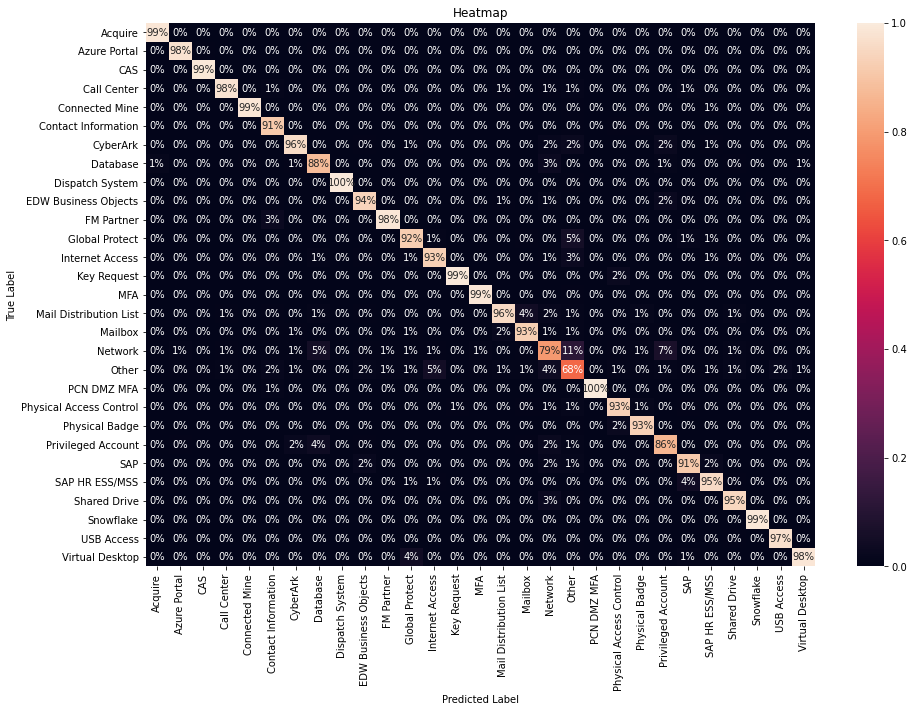

In [106]:
cm_labels = np.unique(y_test)

cm_array = confusion_matrix(y_test,y_pred)
cv_array_df = pd.DataFrame(cm_array, index=cm_labels, columns=cm_labels)
plt.subplots(figsize=(15,10))
ax = sns.heatmap(cv_array_df/np.sum(cv_array_df), fmt='.0%', annot=True, xticklabels=True, yticklabels=True)
ax.set(title="Heatmap",
      xlabel="Predicted Label",
      ylabel="True Label")

Testing area

In [107]:
Test = 'Please update the mfa phone number of account .. 123 123asd'

In [108]:
Test = word_tokenize(Test)
Test = prepare_text(Test)
Test = tostr(Test)
TestExplainer = Test  #Save Test in this step to use it after in Explainer
Test = vectorizer.transform([Test])
Test

<1x15000 sparse matrix of type '<class 'numpy.int64'>'
	with 11 stored elements in Compressed Sparse Row format>

In [109]:
Log_Ridge.predict(Test)

array(['MFA'], dtype=object)

Probabilities obtained for the predicted result:

In [110]:
cm_labels = np.unique(y_test)
np.save('labelsAccessManagement',cm_labels)

In [111]:
np.load('labelsAccessManagement.npy',allow_pickle=True)

array(['Acquire', 'Azure Portal', 'CAS', 'Call Center', 'Connected Mine',
       'Contact Information', 'CyberArk', 'Database', 'Dispatch System',
       'EDW Business Objects', 'FM Partner', 'Global Protect',
       'Internet Access', 'Key Request', 'MFA', 'Mail Distribution List',
       'Mailbox', 'Network', 'Other', 'PCN DMZ MFA',
       'Physical Access Control', 'Physical Badge', 'Privileged Account',
       'SAP', 'SAP HR ESS/MSS', 'Shared Drive', 'Snowflake', 'USB Access',
       'Virtual Desktop'], dtype=object)

In [112]:
prob = Log_Ridge.predict_proba(Test)
probas = pd.DataFrame()
probas['Type'] = cm_labels
probas['Prob'] = prob[0]
probas.sort_values('Prob', ascending=False)[0:].style.highlight_max(color = 'lightgreen', axis = 0)

,Type,Prob
14,MFA,0.901721
5,Contact Information,0.018314
18,Other,0.013285
17,Network,0.006063
6,CyberArk,0.005412
19,PCN DMZ MFA,0.004707
10,FM Partner,0.003781
23,SAP,0.003477
25,Shared Drive,0.002886
9,EDW Business Objects,0.002670


Explainer: what feature weights the most for each class

In [113]:
import eli5
explanation = eli5.show_weights(Log_Ridge, vec=vectorizer, top=20)

In [114]:
explanation

Explanation: for a particular observation, explain why the predicted value was what it was

In [115]:
from lime import lime_text
from sklearn.pipeline import make_pipeline
c = make_pipeline(vectorizer, Log_Ridge)

In [116]:
print(c.predict_proba(X_test[0:1]).round(3))

[[0.015 0.019 0.018 ... 0.023 0.018 0.013]
 [0.016 0.017 0.018 ... 0.023 0.018 0.013]
 [0.015 0.016 0.018 ... 0.027 0.018 0.013]
 ...
 [0.016 0.015 0.018 ... 0.022 0.018 0.013]
 [0.016 0.015 0.018 ... 0.022 0.017 0.013]
 [0.015 0.016 0.019 ... 0.022 0.018 0.013]]


In [117]:
from lime.lime_text import LimeTextExplainer
explainer = LimeTextExplainer(class_names=np.unique(y_test))

In [118]:
exp = explainer.explain_instance(TestExplainer, c.predict_proba, num_features=10, top_labels=1)
print(exp.available_labels())

[14]


In [119]:
exp.show_in_notebook(text=True)

In [120]:
from IPython.display import HTML

html_data = exp.as_html()
HTML(data=html_data)